### I. Commentaire de l'article "The Cointegration Alpha: Enhanced Index Tracking and Long-Short Equity Market Neutral Strategies"

Cet article propose différentes applications de stratégies d'investissement basées sur la cointégration, on note : 

- une stratégie classique de suivi d'indices;
- une stratégie d'actions long-short market neutral;
- une combinaison des deux approches précédentes.

L'idée de la première stratégie est de reproduire les rendements et la volatilité d'un indice de référence spécifique (exemple du CAC40), c'est-à-dire un portefeuille ayant de propriétés similaires à celui de l'indice en termes de rendements, volatilité et corrélation; tandis que les deux stratégies suivantes visent à minimiser la volatilité et générer des rendements stables quelles que soient les conditions de marché.

L'avantage de se baser sur la cointégration pour l'optimisation de portefeuille est qu'elle permet d'utiliser toutes les informations comprises dans les prix et de construire des poids sur le comportement long terme des actions.

One of the advantages of estimating the portfolio weights based on cointegration coefficients is their
enhanced stability. Being constructed on a rather long history of prices, they tend to ignore short-term
movements in stock prices, such as bubbles or just noise, and focus on the long-run behaviour of the
prices. 

The main point of our analysis was to show that, when applied to constructing trading strategies, the
cointegration technique produces encouraging results. Its key characteristics, i.e. mean reverting
tracking error, enhanced weights stability and better use of the information contained in stock prices,
allow a flexible design of various trading strategies, from index tracking to long-short market neutral.

## II. Expériences numériques transposées au marché français.

### 0. Data 

On pré-processe ici les données du CAC40 de 2001 à nos jours. Pour certaines valeurs, les données sont manquantes à partir d'un certain rang, on les complète naïvement par la dernière valeur présente dans cette colonne.

In [5]:
import pandas as pd
import numpy as np
from utils_long_short import calculer_rendement_iteratif

In [2]:
file_path = '../data/CAC.xlsx'
sheet_name_weights = 'Worksheet'
sheet_name_data = 'Data'

df_weights = pd.read_excel(file_path, sheet_name=sheet_name_weights, index_col=0)
dict_weights_CAC = df_weights['Poids'].to_dict()

df_data = pd.read_excel(file_path, sheet_name=sheet_name_data, index_col=0)
df_data = df_data.fillna(method='ffill')

/var/folders/jb/8bmzmwqn3h14s2z9jr4gfg880000gn/T/ipykernel_10408/1987031244.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_data = df_data.fillna(method='ffill')


In [3]:
dict_weights_CAC

{'AI FP Equity': 0.0534,
 'AIR FP Equity': 0.0476,
 'ALO FP Equity': 0.0022,
 'MT NA Equity': 0.0077,
 'CS FP Equity': 0.0327,
 'BNP FP Equity': 0.0426,
 'EN FP Equity': 0.0038,
 'CAP FP Equity': 0.0182,
 'CA FP Equity': 0.0055,
 'SGO FP Equity': 0.0178,
 'ML FP Equity': 0.0133,
 'ACA FP Equity': 0.0079,
 'BN FP Equity': 0.0217,
 'DSY FP Equity': 0.0173,
 'EDEN FP Equity': 0.0078,
 'ENGI FP Equity': 0.017,
 'EL FP Equity': 0.0332,
 'ERF FP Equity': 0.0043,
 'RMS FP Equity': 0.0352,
 'KER FP Equity': 0.0173,
 'OR FP Equity': 0.0619,
 'LR FP Equity': 0.0146,
 'MC FP Equity': 0.1064,
 'ORA FP Equity': 0.0111,
 'RI FP Equity': 0.019,
 'PUB FP Equity': 0.0112,
 'RNO FP Equity': 0.0045,
 'SAF FP Equity': 0.0335,
 'SAN FP Equity': 0.0585,
 'SU FP Equity': 0.0601,
 'GLE FP Equity': 0.0104,
 'STLAP FP Equity': 0.029,
 'STMPA FP Equity': 0.0168,
 'TEP FP Equity': 0.0046,
 'HO FP Equity': 0.0081,
 'TTE FP Equity': 0.09,
 'URW FP Equity': 0.0046,
 'VIE FP Equity': 0.0101,
 'DG FP Equity': 0.0351,


In [4]:
df_data

,CAC Index,OR FP Equity,DG FP Equity,STLAP FP Equity,TTE FP Equity,DSY FP Equity,AI FP Equity,ERF FP Equity,CS FP Equity,BNP FP Equity,...,VIE FP Equity,SAN FP Equity,GLE FP Equity,SU FP Equity,AIR FP Equity,URW FP Equity,LR FP Equity,ACA FP Equity,RI FP Equity,STMPA FP Equity
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-02,5798.90,88.80,16.4820,12.750,39.0814,1900-01-06 18:43:12,29.1563,1900-01-03 06:57:36,36.7977,1900-02-13 22:32:00.960000,...,1900-02-12 14:27:18.720000,1900-03-08 19:47:51.360000,1900-02-26 20:33:56.160000,1900-02-06 17:09:44.640000,1900-01-23 11:45:36,1900-07-14 16:33:36,1900-01-19 18:00:00,14.9562,1900-01-22 13:29:08.160000,42.590
2001-01-03,5684.05,84.80,16.0770,13.147,38.7113,1900-01-06 08:52:48,28.9480,1900-01-02 22:06:14.400000,36.2781,1900-02-13 01:42:05.760000,...,1900-02-12 14:27:18.720000,1900-03-07 21:07:20.640000,1900-02-26 06:49:06.240000,1900-02-06 07:39:38.880000,1900-01-23 04:33:36,1900-07-12 04:33:36,1900-01-23 05:16:48,15.7941,1900-01-22 16:26:41.280000,40.100
2001-01-04,5815.99,84.20,15.4634,13.189,37.9218,1900-01-07 02:24:00,29.7243,1900-01-03 12:54:43.200000,36.2072,1900-02-14 14:44:00.960000,...,1900-02-08 11:26:09.600000,1900-03-04 03:36:34.560000,1900-03-01 16:34:19.200000,1900-02-06 02:54:31.680000,1900-01-23 04:48:00,1900-07-09 16:48:00,1900-01-23 01:40:48,16.1275,1900-01-23 10:11:51.360000,45.200
2001-01-05,5758.02,81.30,16.2979,12.933,37.9958,1900-01-06 18:57:36,29.9136,1900-01-03 14:24:00,34.9082,1900-02-15 02:53:05.280000,...,1900-02-09 02:03:50.400000,1900-03-02 01:28:59.520000,1900-03-01 16:34:19.200000,1900-02-05 09:41:02.400000,1900-01-21 21:36:00,1900-07-10 21:36:00,1900-01-22 12:00:00,15.9473,1900-01-22 19:24:14.400000,44.250
2001-01-08,5732.80,80.40,15.7947,12.521,38.4646,1900-01-06 12:14:24,30.2733,1900-01-03 14:45:36,34.5067,1900-02-14 19:21:47.520000,...,1900-02-10 03:56:35.520000,1900-03-01 13:32:52.800000,1900-03-03 06:38:44.160000,1900-02-06 20:43:35.040000,1900-01-22 19:12:00,1900-07-12 07:40:48,1900-01-23 04:48:00,15.8932,1900-01-22 19:24:14.400000,43.400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-22,7911.60,451.15,115.5200,24.360,59.1300,43.295,185.4200,58.02,32.0600,56.22,...,30.35,88.74,22.47,210,147.28,67.42,92.1,12.5740,159.85,42.205
2024-02-23,7966.68,450.20,116.7600,24.360,59.6600,43.33,189.5000,58.64,32.3000,56.39,...,30.19,89.71,22.495,205.5,147.96,67.42,92.1,12.5740,157.95,41.545
2024-02-26,7929.82,450.65,116.2000,24.360,59.1900,43.19,189.7400,54.74,32.3750,55.34,...,29.52,89.28,22.255,207.4,147.34,67.42,92.1,12.5740,157.15,41.380


# Long short Market neutral strategy 

On ajoute au benchmark en rendement supplémentaire de x% distrbué uniformément sur les jours. On va prendre x valant 5%, 10% et 15%. On le retire et on l'ajoute pour contruire un 'index_plus' et un 'index_minus'. 

### Création d'un index_plus et d'un index_minus

In [28]:


def calculer_rendement_iteratif(df_data, date_debut, rendement_annuel):
    """
    Calcule et ajoute un rendement quotidien de manière itérative à l'index CAC à partir d'une date de départ.
    
    :param df_data: DataFrame contenant les indices CAC avec des dates comme index.
    :param date_debut: La date de début pour le calcul du rendement (format 'YYYY-MM-DD').
    :param rendement_annuel: Le rendement annuel souhaité en pourcentage.
    :return: Un DataFrame avec les indices CAC ajustés quotidiennement par le rendement.
    """
    # Calculer le rendement quotidien équivalent
    rendement_quotidien = rendement_annuel / 100 / 365
    
    # Filtrer le DataFrame pour les dates après la date de début (incluse)
    df_subset = df_data.loc[date_debut:].copy()
    
    # Initialiser l'index ajusté avec la première valeur de l'index CAC
    index_ajuste = [df_subset.iloc[0]['CAC Index']]
    
    # Appliquer le rendement itérativement
    for i in range(1, len(df_subset)):
        # Ajouter le rendement quotidien au dernier index ajusté
        v_t_plus_1 = df_subset.iloc[i]['CAC Index']
        v_t = df_subset.iloc[i-1]['CAC Index']

        valeur_ajustee = index_ajuste[-1]*(1+(v_t_plus_1-v_t)/v_t +rendement_quotidien)
        index_ajuste.append(valeur_ajustee)
    
    # Assigner les valeurs ajustées au DataFrame
    df_subset['CAC Index Ajusté'] = index_ajuste
    
    return df_subset



In [29]:
df_ajuste = calculer_rendement_iteratif(df_data, '2001-01-03', 5) #dataframe, date_depart, augmentation par an en pourcentage
print(df_ajuste["CAC Index Ajusté"])

Date
2001-01-03     5684.050000
2001-01-04     5816.768637
2001-01-05     5759.587694
2001-01-08     5735.149812
2001-01-09     5666.296916
                  ...     
2024-02-22    17808.546254
2024-02-23    17934.967621
2024-02-26    17854.443487
2024-02-27    17898.723234
2024-02-28    17914.663785
Name: CAC Index Ajusté, Length: 5928, dtype: float64


<Axes: xlabel='Date'>

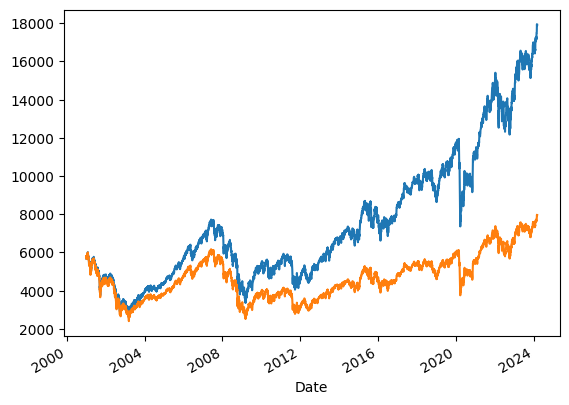

In [31]:
df_ajuste["CAC Index Ajusté"].plot()
df_data["CAC Index"].plot()